In [1]:
import numpy as np
import pandas as pd

spam= pd.read_csv('spam.csv',encoding='Latin-1')


In [2]:
spam.shape

(5572, 5)

Data cleaning


In [3]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [5]:
spam.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
spam['target']=encoder.fit_transform(spam['target'])

In [7]:
spam.isnull().sum()
spam.duplicated().sum()

np.int64(403)

In [8]:
spam=spam.drop_duplicates(keep='first')

In [9]:
spam.duplicated().sum()

np.int64(0)

In [10]:
spam.shape

(5169, 2)

EDA

In [11]:
spam['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

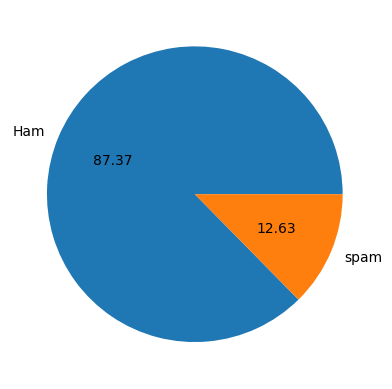

In [12]:
import matplotlib .pyplot as plt
plt.pie(spam['target'].value_counts(),labels=['Ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sidth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
from nltk.tokenize import word_tokenize,sent_tokenize 
spam['number_of_characters']=spam['text'].apply(len)
spam['number of words'] = spam['text'].apply(lambda x: len(nltk.word_tokenize(x)))
spam["number of sentences"]= spam['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   target                5169 non-null   int64 
 1   text                  5169 non-null   object
 2   number_of_characters  5169 non-null   int64 
 3   number of words       5169 non-null   int64 
 4   number of sentences   5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [15]:
spam[['number_of_characters','number of words','number of sentences']].describe()

,number_of_characters,number of words,number of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [16]:
spam[spam['target'] == 0][['number_of_characters', 'number of words', 'number of sentences']].describe()


,number_of_characters,number of words,number of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [17]:
spam[spam['target'] == 1][['number_of_characters', 'number of words', 'number of sentences']].describe()

,number_of_characters,number of words,number of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


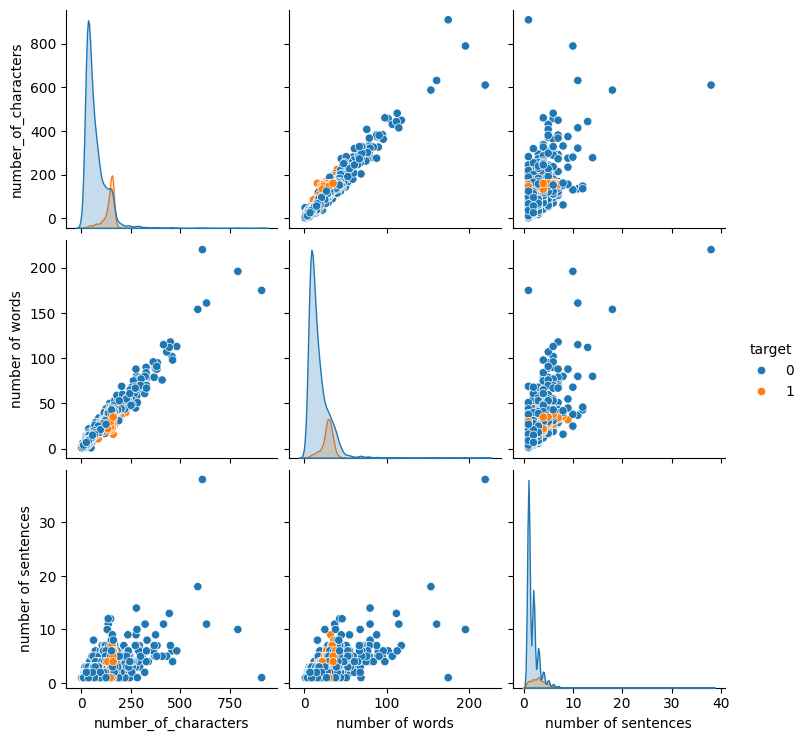

In [18]:
import seaborn as sns

sns.pairplot(spam,hue='target')

<Axes: >

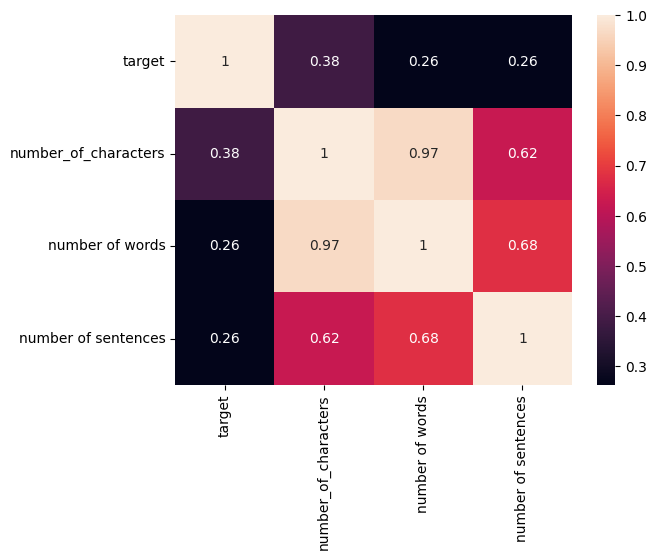

In [19]:
sns.heatmap(spam.select_dtypes(include=['number']).corr(),annot=True)

Text Preprocessing


In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
def transform_text(text):
    text =text.lower()
    text = nltk.word_tokenize(text)
    wl= WordNetLemmatizer()
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear
    for i in text:
        y.append(wl.lemmatize(i))
    return " ".join(y)        


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
spam['transformed_text'] =spam['text'].apply(transform_text)

In [22]:
spam.head()

,target,text,number_of_characters,number of words,number of sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah thi...


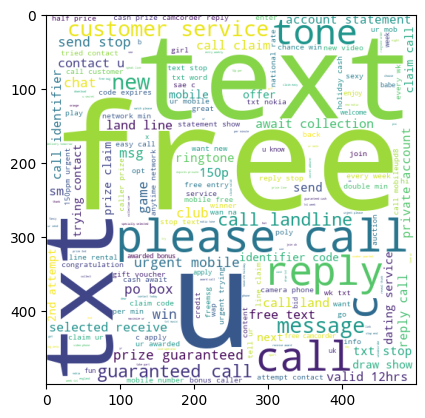

In [23]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,background_color='white',font_step=5)
spam_wc = wc.generate(spam[spam['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

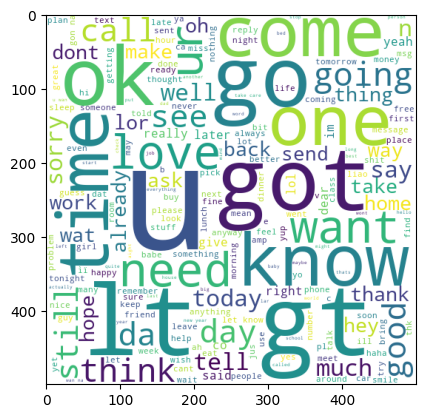

In [24]:
ham_wc = wc.generate(spam[spam['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [25]:
spam_corpus=[]
for msg in spam[spam['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

from collections import Counter
Counter(spam_corpus).most_common(30)


[('call', 615),
 ('free', 382),
 ('2', 310),
 ('txt', 260),
 ('u', 245),
 ('ur', 238),
 ('text', 225),
 ('mobile', 219),
 ('stop', 208),
 ('claim', 194),
 ('4', 194),
 ('reply', 193),
 ('prize', 163),
 ('get', 140),
 ('new', 128),
 ('c', 125),
 ('send', 116),
 ('urgent', 114),
 ('service', 112),
 ('nokia', 108),
 ('cash', 102),
 ('contact', 102),
 ('tone', 101),
 ('please', 98),
 ('win', 95),
 ('phone', 95),
 ('week', 89),
 ('guaranteed', 84),
 ('customer', 82),
 ('per', 82)]

In [26]:
ham_corpus=[]
for msg in spam[spam['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)


Counter(ham_corpus).most_common(30)


[('u', 1818),
 ('get', 597),
 ('gt', 576),
 ('lt', 574),
 ('2', 568),
 ('go', 506),
 ('got', 472),
 ('know', 458),
 ('like', 445),
 ('come', 437),
 ('ok', 434),
 ('good', 425),
 ('time', 401),
 ('ur', 394),
 ('call', 378),
 ('day', 356),
 ('love', 350),
 ('want', 338),
 ('going', 328),
 ('one', 323),
 ('lor', 318),
 ('need', 317),
 ('4', 312),
 ('home', 304),
 ('still', 286),
 ('da', 283),
 ('see', 270),
 ('think', 256),
 ('back', 254),
 ('r', 248)]

In [27]:
from sklearn .feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tf= TfidfVectorizer(max_features=3000)
##X = cv.fit_transform(spam['transformed_text']).toarray()
X = tf.fit_transform(spam['transformed_text']).toarray()
y = spam['target'].values

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8820116054158608
[[797  99]
 [ 23 115]]
0.5373831775700935


In [29]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [30]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [32]:
svc= SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc =DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc =ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimator=50,random_state=2) 

In [33]:
models={
    'SVC':svc,
    'KNC':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb

}

In [34]:
def train_classifier(models,X_train,y_train,X_test,y_test):
    models.fit(X_train,y_train)
    y_pred= models.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)

    return accuracy,precision

In [35]:
accuracy_scores = []  
precision_scores = [] 

for name, model in models.items():
    current_precision, current_accuracy = train_classifier(model, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy-", current_accuracy)
    print("precision_score", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    
    


For SVC
Accuracy- 0.9747899159663865
precision_score 0.9758220502901354
For KNC
Accuracy- 1.0
precision_score 0.9081237911025145
For NB
Accuracy- 1.0
precision_score 0.9748549323017408
For DT
Accuracy- 0.8543689320388349
precision_score 0.937137330754352
For LR
Accuracy- 0.9787234042553191
precision_score 0.9535783365570599
For RF
Accuracy- 0.9743589743589743
precision_score 0.9738878143133463
For AdaBoost
Accuracy- 0.8888888888888888
precision_score 0.9274661508704062
For BgC
Accuracy- 0.8828125
precision_score 0.9613152804642167
For ETC
Accuracy- 0.9754098360655737
precision_score 0.9787234042553191
For GBDT
Accuracy- 0.9158878504672897
precision_score 0.9526112185686654


d:\project\SpamClassifier\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:34:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


For xgb
Accuracy- 0.9661016949152542
precision_score 0.9729206963249516


In [36]:
performance_df = pd.DataFrame({
    'Algorithm': list(models.keys()),
    'Accuracy': accuracy_scores,
    'precision_score': precision_scores
})

performance_df.head()

,Algorithm,Accuracy,precision_score
0,SVC,0.974790,0.975822
1,KNC,1.000000,0.908124
2,NB,1.000000,0.974855
3,DT,0.854369,0.937137
4,LR,0.978723,0.953578


In [37]:
import pickle

with open('vectorize.pkl','wb') as file:
    pickle.dump(tf,file)

with open ("model.pkl",'wb') as file:
    pickle.dump(mnb,file)    